In [1]:
# referencing Module 17 - 1 - Ins_Multiple_Linear_Regression_Sklearn
# referencing Module 17 - linear regression
# referencing Module 19  - AlphabetSoupCharity.ipynb


import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf

%matplotlib inline
# import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns


# Pull Cleaned Data from Python and Excel
- changed column names so no spaces - in Excel
- deleted 12 rows of null value data - in Python
- changed datatype of columns (from object to int or float64) - in Python
- changed Streams to a 'Number' - which took the comma out of it - in Python
- changed Genre column to only contain 1 Genre vs. an array of Genres - in Python
- There are 1,470 Rows of Data

In [2]:
# Read the data in a .csv file
df = pd.read_csv(Path('clean_data2.csv'))
df

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,hip hop,7/9/2021,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,6/25/2021,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,hip hop,7/23/2021,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,195,1,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,pop,6/2/2017,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A
1466,196,1,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,latin,10/11/2019,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1467,197,1,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,pop,1/12/2018,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D
1468,198,1,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,soul,9/25/2019,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [3]:
# Determine data types and verify needed columns are changed to int64 or float64

df.dtypes

Highest_Charting_Position      int64
Number_of_Times_Charted        int64
Song_Name                     object
Streams                        int64
Artist                        object
Artist_Followers               int64
Song_ID                       object
Genre                         object
Release_Date                  object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration_(ms)                  int64
Valence                      float64
Chord                         object
dtype: object

In [4]:
# Determine datatype and if any null values remaining

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest_Charting_Position  1470 non-null   int64  
 1   Number_of_Times_Charted    1470 non-null   int64  
 2   Song_Name                  1470 non-null   object 
 3   Streams                    1470 non-null   int64  
 4   Artist                     1470 non-null   object 
 5   Artist_Followers           1470 non-null   int64  
 6   Song_ID                    1470 non-null   object 
 7   Genre                      1470 non-null   object 
 8   Release_Date               1470 non-null   object 
 9   Popularity                 1470 non-null   int64  
 10  Danceability               1470 non-null   float64
 11  Energy                     1470 non-null   float64
 12  Loudness                   1470 non-null   float64
 13  Speechiness                1470 non-null   float

# Check for Linear relationships

### Original Analysis determined that we would be using Multiple Linear Regression analysis
- Compare Streams to the various Features in the dataset
- we first need to determine if there are any Linear realationships in the data
- after review, there is very little direct linear regression in this dataset
- we will need to review other models below

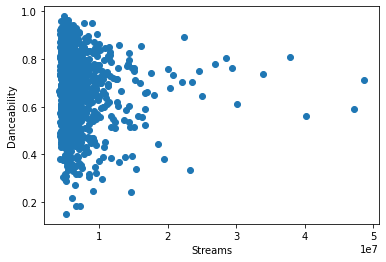

In [5]:
# Check for linear relationship between Streams and Danceability

plt.scatter(df.Streams, df.Danceability)
plt.xlabel('Streams')
plt.ylabel('Danceability')
plt.show()

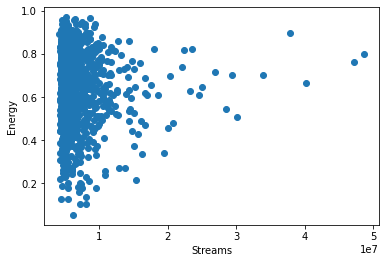

In [6]:
# Check for linear relationship between Streams  AND Energy

plt.scatter(df.Streams, df.Energy)
plt.xlabel('Streams')
plt.ylabel('Energy')
plt.show()

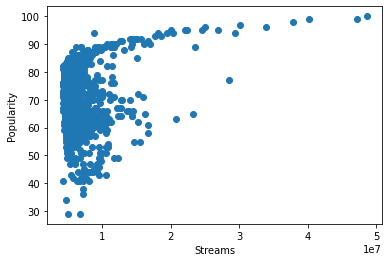

In [7]:
# Check for linear relationship between Streams and Popularity

plt.scatter(df.Streams, df.Popularity)
plt.xlabel('Streams')
plt.ylabel('Popularity')
plt.show()

# Visualize the Data

### We will be reviewing if we can predict Streaming based on the features of the dataset
- review top Streaming data for Artists, Genre and Song

### Top 10 Streamed Artists

In [8]:
#Sorting by Streams - top 10
sort_streams=df.sort_values('Streams',ascending=False).head(10)
sort_streams

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,hip hop,7/9/2021,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,6/25/2021,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,hip hop,7/23/2021,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,1,18,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,hip hop,3/31/2021,97,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758,G#/Ab
6,3,16,Kiss Me More (feat. SZA),29356736,Doja Cat,8640063,748mdHapucXQri7IAO8yFK,pop,4/9/2021,94,0.762,0.701,-3.541,0.0286,0.2350,0.1230,110.968,208867,0.742,G#/Ab
1349,7,1,Intentions,28509534,"Justin Bieber, Quavo",48544923,4umIPjkehX1r7uhmGvXiSV,pop,2/14/2020,77,0.806,0.546,-6.637,0.0575,0.3000,0.1020,147.986,212867,0.874,A
7,2,10,Todo De Ti,26951613,Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,latin,5/20/2021,95,0.780,0.718,-3.605,0.0506,0.3100,0.0932,127.949,199604,0.342,D#/Eb
8,3,8,Yonaguni,25030128,Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,latin,6/4/2021,96,0.644,0.648,-4.601,0.1180,0.2760,0.1350,179.951,206710,0.440,C#/Db


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

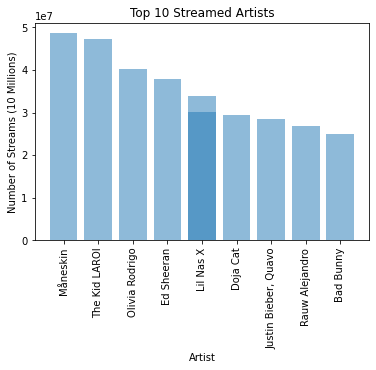

In [9]:
# create a barchart for top 10 Streamed Artists
# NOTE: Lil Nas in spots 5 and 6
x_axis = sort_streams.Artist
y_axis = sort_streams.Streams
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Streamed Artists")
plt.xlabel("Artist")
plt.ylabel("Number of Streams (10 Millions)")
plt.xticks(rotation='vertical')

### Top 10 Streamed Genres

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

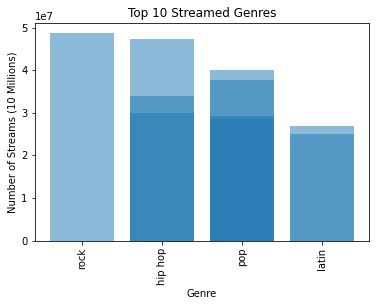

In [10]:
# create a barchart for top 10 Streamed Genres
x_axis = sort_streams.Genre
y_axis = sort_streams.Streams
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Streamed Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Streams (10 Millions)")
plt.xticks(rotation='vertical')

# # plot with seaborn example
# plt.figure(figsize=(20,8))
# plt.title("top 10 streamed genres")
# sns.barplot(x='Genre', y='Streams', data=sort_streams.head(10))

### Top 10 Charted Songs

In [11]:
# sort by Highest Charting Position - Top 10
sort_chart=df.sort_values('Highest_Charting_Position',ascending=True).head(10)
sort_chart

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.127,0.3590,134.002,211560,0.589,B
73,1,83,Dance Monkey,7687058,Tones And I,2819593,2XU0oxnq2qxCpomAAuJY8K,pop,10/17/2019,83,0.824,0.588,-6.400,0.0924,0.692,0.1490,98.027,209438,0.513,F#/Gb
84,1,40,positions,7244853,Ariana Grande,67158068,35mvY5S1H3J2QZyna3TFe0,pop,10/30/2020,86,0.737,0.802,-4.771,0.0878,0.468,0.0931,144.015,172325,0.682,C
656,1,12,cardigan,5845457,Taylor Swift,42227614,4R2kfaDFhslZEMJqAFNpdd,pop,7/24/2020,79,0.613,0.581,-8.588,0.0424,0.537,0.2500,130.033,239560,0.551,C
286,1,55,Rain On Me (with Ariana Grande),5041656,Lady Gaga,18572085,24ySl2hOPGCDcxBxFIqWBu,pop,5/22/2020,79,0.672,0.855,-3.764,0.0397,0.021,0.3230,123.056,182200,0.646,A
760,1,27,THE SCOTTS,4941592,"THE SCOTTS, Travis Scott, Kid Cudi",179193,39Yp9wwQiSRIDOvrVg7mbk,hip hop,4/24/2020,79,0.716,0.537,-7.648,0.0514,0.233,0.1570,129.979,165978,0.280,C
258,1,78,The Box,5145099,Roddy Ricch,6603627,0nbXyq5TXYPCO7pr3N8S4I,hip hop,12/6/2019,84,0.896,0.586,-6.687,0.0559,0.104,0.7900,116.971,196653,0.642,A#/Bb
249,1,55,Savage Love (Laxed - Siren Beat),5108950,"Jawsh 685, Jason Derulo",100604,1xQ6trAsedVPCdbtDAmk0c,pop,6/11/2020,82,0.767,0.481,-8.520,0.0803,0.234,0.2690,150.076,171375,0.761,C
45,1,51,Mood (feat. iann dior),10222056,24kGoldn,1274433,4jPy3l0RUwlUI9T5XHBW2m,hip hop,3/26/2021,89,0.701,0.716,-3.671,0.0361,0.174,0.3240,91.007,140533,0.732,G
110,1,67,ROCKSTAR (feat. Roddy Ricch),6180056,DaBaby,7593046,7ytR5pFWmSjzHJIeQkgog4,hip hop,4/17/2020,86,0.746,0.690,-7.956,0.1640,0.247,0.1010,89.977,181733,0.497,B


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

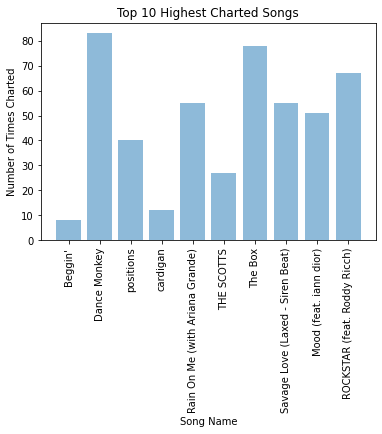

In [12]:
# barchart with top 10 Songs and number of times charted
x_axis = sort_chart.Song_Name
y_axis = sort_chart.Number_of_Times_Charted
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Highest Charted Songs")
plt.xlabel("Song Name")
plt.ylabel("Number of Times Charted")
plt.xticks(rotation='vertical')

# Prediction on Streams
- Can we predict the number of Streams based on the features in the dataset
- We will be using several different models to see which one most accurately predicts the number of Streams

## PREPROCESSING

In [13]:
# Clean data some more and drop some unnecessary columns
clean_df = df.drop(['Artist', 'Song_Name', 'Release_Date', 'Song_ID', 'Chord'], axis=1)
clean_df.head()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
0,1,8,48633449,3377762,rock,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,hip hop,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,pop,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,pop,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,hip hop,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [14]:
# Encoding Genre using LabelEncoder (which replaces values with numbers in Genre column)
# Originally using OneHotEncoder, splitting Genre into different columns - THIS DID NOT WORK
genre_encoder = LabelEncoder()
clean_df['Genre'] = genre_encoder.fit_transform(clean_df['Genre'])
clean_df.head()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
0,1,8,48633449,3377762,7,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,2,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,6,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,6,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,2,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [30]:
# Split data into Training and Testing Sets
training_data, testing_data = train_test_split(clean_df, test_size=0.2, random_state=78)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1176
No. of testing examples: 294


,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
471,24,25,5168240,786461,5,77,0.905,0.686,-3.152,0.0664,0.0907,0.2660,103.013,155825,0.963
1090,54,14,4645541,1276406,2,76,0.686,0.541,-4.993,0.0493,0.0420,0.0675,120.082,112493,0.724
441,152,1,5796978,13697048,6,65,0.493,0.263,-12.805,0.0351,0.9260,0.0879,122.792,333710,0.158
979,95,1,7112419,6852509,2,63,0.717,0.474,-8.383,0.4030,0.0509,0.1390,123.906,185804,0.448
1085,92,2,5018592,5436999,6,70,0.715,0.827,-5.090,0.0617,0.0485,0.3210,117.977,185277,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,38,7,4914412,10741972,8,72,0.910,0.604,-4.392,0.0820,0.4480,0.0863,110.075,180788,0.807
728,163,4,4713873,3152313,5,76,0.684,0.808,-2.737,0.0610,0.0518,0.0858,173.905,174027,0.712
63,12,83,8490162,8384096,6,86,0.501,0.405,-5.679,0.0319,0.7510,0.1050,109.891,182161,0.446
1008,36,21,4374392,14190858,6,76,0.790,0.694,-7.726,0.0708,0.1450,0.2810,103.007,181436,0.508


In [31]:
# Dropping Stream Column From Test data
y_test=testing_data['Streams']
x_test=testing_data.drop('Streams', axis=1)
x_test.head()

,Highest_Charting_Position,Number_of_Times_Charted,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
471,24,25,786461,5,77,0.905,0.686,-3.152,0.0664,0.0907,0.2660,103.013,155825,0.963
1090,54,14,1276406,2,76,0.686,0.541,-4.993,0.0493,0.0420,0.0675,120.082,112493,0.724
441,152,1,13697048,6,65,0.493,0.263,-12.805,0.0351,0.9260,0.0879,122.792,333710,0.158
979,95,1,6852509,2,63,0.717,0.474,-8.383,0.4030,0.0509,0.1390,123.906,185804,0.448
1085,92,2,5436999,6,70,0.715,0.827,-5.090,0.0617,0.0485,0.3210,117.977,185277,0.750


In [32]:
# Dropping Stream column from Training Data
y_train=training_data['Streams']
x_train=training_data.drop('Streams',axis=1)
x_train.head()

,Highest_Charting_Position,Number_of_Times_Charted,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
1304,56,1,37151476,4,72,0.720,0.824,-5.086,0.1280,0.0394,0.0509,165.998,225012,0.333
1125,53,1,56327031,2,64,0.812,0.506,-7.706,0.1160,0.2810,0.3250,145.074,237946,0.554
139,128,7,77034,6,83,0.650,0.792,-3.825,0.0393,0.6070,0.9200,154.027,225672,0.872
499,83,11,3134041,5,77,0.650,0.655,-3.710,0.4050,0.2500,0.0691,94.059,171215,0.735
832,194,1,7593792,1,71,0.681,0.773,-5.749,0.1480,0.0190,0.1100,119.961,199008,0.429


In [33]:
# Shapes of training and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1176, 14), (1176,), (294, 14), (294,))

## LINEAR REGRESSION MODEL

In [34]:
# LINEAR REGRESSION MODEL

#Linear Regression Modeling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
#print(linear_model.score(x_train,y_train))
print(linear_model.score(x_test,y_test))

#testing the model and Displaying the output
linear_predict=linear_model.predict(x_test)
l_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':linear_predict,'Actual Stream':y_test})
print(l_output)


0.16613852078470892
        Id  Predicted Streams  Actual Stream
471    471       7.104904e+06        5168240
1090  1090       7.125888e+06        4645541
441    441       5.398976e+06        5796978
979    979       5.755062e+06        7112419
1085  1085       7.147027e+06        5018592
...    ...                ...            ...
751    751       7.421528e+06        4914412
728    728       5.961946e+06        4713873
63      63       4.469510e+06        8490162
1008  1008       7.072092e+06        4374392
524    524       5.868402e+06        4873380

[294 rows x 3 columns]


#### LINEAR REGRESSION RESULTS:
- $R^2$:  .097

## RANDOM FOREST REGRESSION MODEL

In [54]:
# RANDOM FOREST REGRESSION

#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=100)
r_model.fit(x_train,y_train)
print(r_model.score(x_test,y_test))

#Making predictions on test set 
r_predict=r_model.predict(x_test)

r_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':r_predict,'Actual Stream':y_test})
print(r_output)


0.8297901177817254
        Id  Predicted Streams  Actual Stream
471    471         5530404.22        5168240
1090  1090         5019729.36        4645541
441    441         5848973.84        5796978
979    979         7458513.43        7112419
1085  1085         5113202.85        5018592
...    ...                ...            ...
751    751         4848171.44        4914412
728    728         4984460.56        4713873
63      63         6824063.95        8490162
1008  1008         4806969.83        4374392
524    524         4841985.95        4873380

[294 rows x 3 columns]


#### RANDOM FOREST REGRESSION RESULTS:
- $R^2$:  .82

In [50]:
from pprint import pprint
pprint(r_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## RANDOM FOREST CLASSIFIER MODEL

In [42]:
# RANDOM FOREST CLASSIFIER

#Random Forest Classifier
r_model=RandomForestClassifier(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_test,y_test))

#Making predictions on test set 
r_predict=r_model.predict(x_test)

r_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':r_predict,'Actual Stream':y_test})
print(r_output)

0.0
        Id  Predicted Streams  Actual Stream
471    471            4911162        5168240
1090  1090            4625985        4645541
441    441           13810722        5796978
979    979            6540577        7112419
1085  1085            4642057        5018592
...    ...                ...            ...
751    751            5041120        4914412
728    728            5024683        4713873
63      63            6813800        8490162
1008  1008            4931163        4374392
524    524            5258000        4873380

[294 rows x 3 columns]


#### RANDOM FOREST CLASSIFIER RESULTS:
- - $R^2$:  0.0

## DEEP NEURAL NETWORK MODEL

In [55]:
# Neural Network to predict Streams

NN_model = Sequential()

# The Input Layer :
#NN_model.add(Dense(150, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN_model.add(Dense(150, input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(250, activation='relu'))
NN_model.add(Dense(250, activation='relu'))
NN_model.add(Dense(250, activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, activation='linear'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 150)               2250      
_________________________________________________________________
dense_11 (Dense)             (None, 250)               37750     
_________________________________________________________________
dense_12 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_13 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 251       
Total params: 165,751
Trainable params: 165,751
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Add checkpoints for callback

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [45]:
# Compile the model
NN_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#NN_model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# NOTE:  ignore the warning when adding in period=5....it still works... per Stackflow

In [46]:
# Train the model
fit_model = NN_model.fit(x_train, y_train, epochs=500, callbacks=[cp_callback])

Epoch 1/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 2/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 3/500
37/37 [==============================] - 0s 1ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 4/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 5/500
37/37 [==============================] - 0s 1ms/step - loss: 98752416.0000 - accuracy: 0.0000e+00

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 7/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 8/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 9/500
37/37 [==============================] - 0s 1ms/st

37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 69/500
37/37 [==============================] - 0s 1ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 70/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00

Epoch 00070: saving model to checkpoints\weights.70.hdf5
Epoch 71/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 72/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 73/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 74/500
37/37 [==============================] - 0s 1ms/step - loss: 98752408.0000 - accuracy: 0.0000e+00
Epoch 75/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00

Epoch 00075: saving model to checkpoints\weights.75.hdf5
Epoch 76/

37/37 [==============================] - 0s 1ms/step - loss: 98752416.0000 - accuracy: 0.0000e+00

Epoch 00200: saving model to checkpoints\weights.200.hdf5
Epoch 201/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 202/500
37/37 [==============================] - 0s 1ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 203/500
37/37 [==============================] - 0s 2ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 204/500
37/37 [==============================] - 0s 2ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 205/500
37/37 [==============================] - 0s 2ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00

Epoch 00205: saving model to checkpoints\weights.205.hdf5
Epoch 206/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 207/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00


37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 267/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 268/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 269/500
37/37 [==============================] - 0s 1ms/step - loss: 98752392.0000 - accuracy: 0.0000e+00
Epoch 270/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00

Epoch 00270: saving model to checkpoints\weights.270.hdf5
Epoch 271/500
37/37 [==============================] - 0s 1ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 272/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 273/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 274/500
37/37 [==============================] - 0s 1

37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 399/500
37/37 [==============================] - 0s 2ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00
Epoch 400/500
37/37 [==============================] - 0s 2ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00

Epoch 00400: saving model to checkpoints\weights.400.hdf5
Epoch 401/500
37/37 [==============================] - 0s 2ms/step - loss: 98752408.0000 - accuracy: 0.0000e+00
Epoch 402/500
37/37 [==============================] - 0s 2ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 403/500
37/37 [==============================] - 0s 1ms/step - loss: 98752376.0000 - accuracy: 0.0000e+00
Epoch 404/500
37/37 [==============================] - 0s 1ms/step - loss: 98752384.0000 - accuracy: 0.0000e+00
Epoch 405/500
37/37 [==============================] - 0s 1ms/step - loss: 98752400.0000 - accuracy: 0.0000e+00

Epoch 00405: saving model to checkpoints\weights.405.hdf5


In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = NN_model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



10/10 - 0s - loss: 95544064.0000 - accuracy: 0.0000e+00
Loss: 95544064.0, Accuracy: 0.0


In [48]:
# Predicting the Streams
DNN_predict=NN_model.predict(x_test)

In [49]:
#Creating dataframe to store ID with prediction
DNN_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':DNN_predict[:,0],'Actual Stream':y_test})
print(DNN_output)

        Id  Predicted Streams  Actual Stream
471    471      -12029.810547        5168240
1090  1090      -18275.244141        4645541
441    441     -211495.000000        5796978
979    979     -105522.773438        7112419
1085  1085      -83151.867188        5018592
...    ...                ...            ...
751    751     -167079.921875        4914412
728    728      -47238.921875        4713873
63      63     -129788.546875        8490162
1008  1008     -221333.156250        4374392
524    524      -10815.785156        4873380

[294 rows x 3 columns]


#### DEEP NEURAL NETWORK RESULTS:
- Accuracy:  0%
- Tried changing epoch - did not change results

# FINAL ANALYSIS

- It was determined that any form of Linear Regression (including Multiple Linear Regression) was not going to produce any correct modeling behavior
- The best modeling outcome was using Random Forest Regression, which had a score of .82 in predicitng number of Streams based off of the features
- Not sure if Random Forest Classifier is correct - need further analysis